# Tutorial de análisis y visualizacion de datos

## Importando librerias 
En este taller vamos a trabajar con algunas librerías para python que nos ayudaran a importar/exportar/analizar y visulizar datos.

* pandas: sirve para poder manejar y trabajar facilmente con datos. http://pandas.pydata.org
* seaborn: sirve como libreria de alto nivel para plotear usando matplotlib sin tener que hacer todos los pasos proque ya trae los templates armados. https://pypi.python.org/pypi/seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

## Como leer archivos .csv

In [2]:
df = pd.read_csv('datasets/SacramentocrimeJanuary2006.csv')
df.head(20)

,cdatetime,address,district,beat,grid,crimedescr,ucr_ncic_code,latitude,longitude
0,1/1/06 0:00,3108 OCCIDENTAL DR,3,3C,1115,10851(A)VC TAKE VEH W/O OWNER,2404,38.550420,-121.391416
1,1/1/06 0:00,2082 EXPEDITION WAY,5,5A,1512,459 PC BURGLARY RESIDENCE,2204,38.473501,-121.490186
2,1/1/06 0:00,4 PALEN CT,2,2A,212,10851(A)VC TAKE VEH W/O OWNER,2404,38.657846,-121.462101
3,1/1/06 0:00,22 BECKFORD CT,6,6C,1443,476 PC PASS FICTICIOUS CHECK,2501,38.506774,-121.426951
4,1/1/06 0:00,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY-UNSPECIFIED,2299,38.637448,-121.384613
5,1/1/06 0:00,5301 BONNIEMAE WAY,6,6B,1084,530.5 PC USE PERSONAL ID INFO,2604,38.526979,-121.451338
6,1/1/06 0:00,2217 16TH AVE,4,4A,957,459 PC BURGLARY VEHICLE,2299,38.537173,-121.487577
7,1/1/06 0:00,3547 P ST,3,3C,853,484 PC PETTY THEFT/INSIDE,2308,38.564335,-121.461883
8,1/1/06 0:00,3421 AUBURN BLVD,2,2A,508,459 PC BURGLARY BUSINESS,2203,38.637448,-121.384613
9,1/1/06 0:00,1326 HELMSMAN WAY,1,1B,444,1708 US THEFT OF MAIL,2310,38.609602,-121.491838


## Analizando los datos
Queremos saber cosas sobre estos datos, por ejemplo:

- El crimen mas frecuente 
- El crimen menos frecuente
- El districto con mayor cantidad de crímenes
- etc.

### Primer paso, darle una mirada general a los datos.

In [11]:
df.describe()

,district,grid,ucr_ncic_code,latitude,longitude
count,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,3.574631,916.250791,4275.068829,38.559809,-121.463832
std,1.642512,407.436310,2171.593193,0.056101,0.034621
min,1.000000,102.000000,909.000000,38.437999,-121.555832
25%,2.000000,567.000000,2309.000000,38.518476,-121.489543
50%,3.000000,899.000000,3532.000000,38.559523,-121.465459
75%,5.000000,1264.000000,7000.000000,38.610361,-121.435947
max,6.000000,1661.000000,8102.000000,38.683789,-121.365238


In [3]:
counts_df = df.groupby(['district','crimedescr']).count()
counts_df = pd.DataFrame(counts_df, columns=['grid'])
counts_df.columns = ['count']
counts_df.head()

count
district crimedescr                          
1        10851 VC AUTO THEFT LOCATE        15
         10851(A)VC TAKE VEH W/O OWNER    127
         10852 VC VEHICLE TAMPERING         2
         11350(A)HS POSS CNTRL SUBST        1
         11350(B)HS POSSESS QUAALUDES       1

In [4]:
sorted_counts_df = counts_df.sort_values('count',ascending=False)
sorted_counts_df.head()

,,count
district,crimedescr,
2,10851(A)VC TAKE VEH W/O OWNER,152
3,459 PC BURGLARY VEHICLE,146
1,10851(A)VC TAKE VEH W/O OWNER,127
5,10851(A)VC TAKE VEH W/O OWNER,118
6,TOWED/STORED VEH-14602.6,115


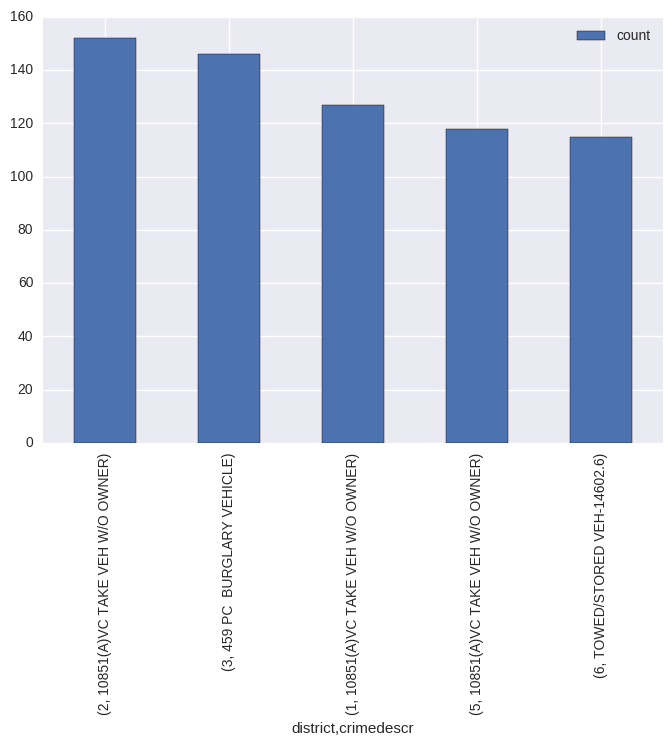

In [14]:
sorted_counts_df.head(5).plot(kind='bar')
sns.plt.show()
#sns.barplot(x='district', y='y', data=dss)
#sns.plt.show()

In [5]:
districts = list(set(df['district']))
districts

[1, 2, 3, 4, 5, 6]

In [7]:
count_df2 = pd.DataFrame({'count' : df.groupby(['district', 'crimedescr']).size()}).reset_index()
count_df2.head()

,district,crimedescr,count
0,1,10851 VC AUTO THEFT LOCATE,15
1,1,10851(A)VC TAKE VEH W/O OWNER,127
2,1,10852 VC VEHICLE TAMPERING,2
3,1,11350(A)HS POSS CNTRL SUBST,1
4,1,11350(B)HS POSSESS QUAALUDES,1


## Mirando una resumen de los datos relevantes
Dado que ahora tenemos un nuevo set de datos, los mismos pueden tener una distribución distinta. Volvemos a mirar un resumen de ellos.

In [8]:
count_df2.describe()

,district,count
count,971.000000,971.000000
mean,3.602472,7.810505
std,1.665463,16.226081
min,1.000000,1.000000
25%,2.000000,1.000000
50%,4.000000,2.000000
75%,5.000000,7.000000
max,6.000000,152.000000


In [18]:
count_df2[count_df2['count']==152]

,district,crimedescr,count
128,2,10851(A)VC TAKE VEH W/O OWNER,152


In [19]:
count_df2[count_df2['count'] == 1]

,district,crimedescr,count
3,1,11350(A)HS POSS CNTRL SUBST,1
4,1,11350(B)HS POSSESS QUAALUDES,1
5,1,11351 HS POSS/SALE OPIATE/NARC,1
9,1,12022.1 PC COMMIT FEL ON BAIL,1
11,1,148.1(A)PC FALSE REPT OF BOMB,1
12,1,1551(A) FUGITIVE FROM JUSTICE,1
20,1,212.5(A)ROBBERY-INHAB DWELLING,1
22,1,23103(A) RECKLESS ON HIGHWAY,1
25,1,23222(B)POSSESS MARIJ IN VEH,1
26,1,240 PC ASSAULT/SIMPLE-CIVILIAN,1


## analizando los crímenes por districtos

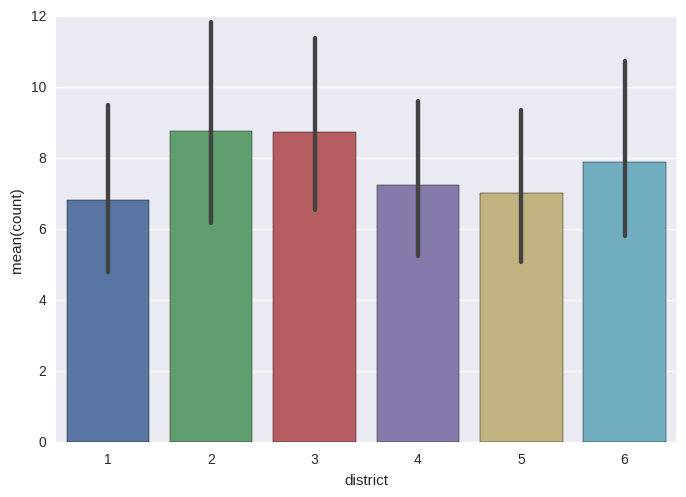

In [9]:
sns.barplot(x='district',y='count',data=count_df2)
sns.plt.show()

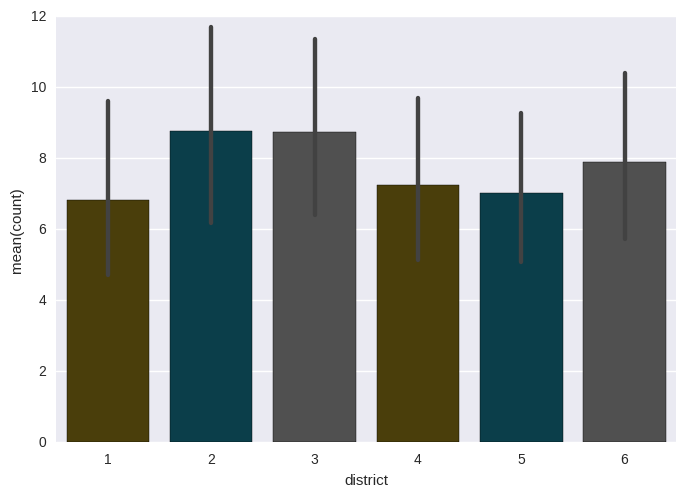

In [21]:
sns.barplot(x='district',y='count', palette=['#554400','#004455','#505050'],data=count_df2)
sns.plt.show()

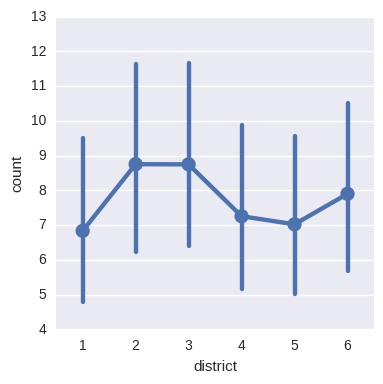

In [22]:
sns.factorplot(x='district', y='count', data=count_df2)
sns.plt.show()

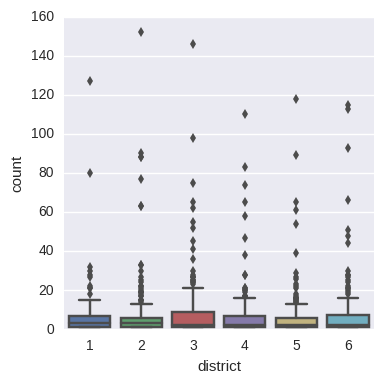

In [23]:
sns.factorplot(x='district', y='count', data=count_df2, kind="box")
sns.plt.show()

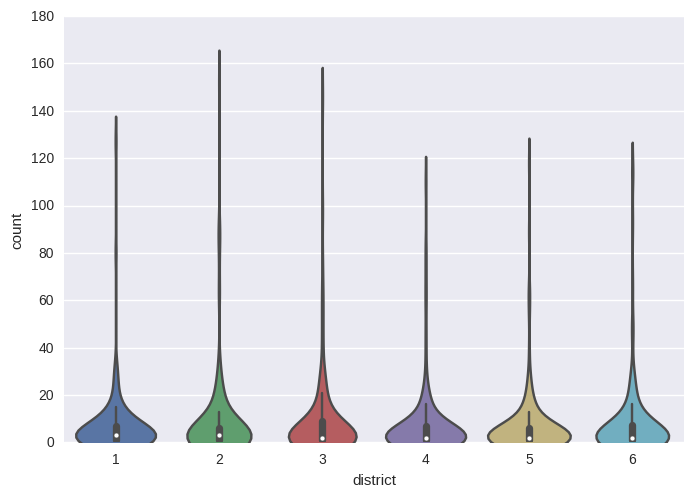

In [24]:
sns.violinplot(x='district', y='count', data=count_df2).set_ylim(0, 180)
sns.despine(left=True);
sns.plt.show()

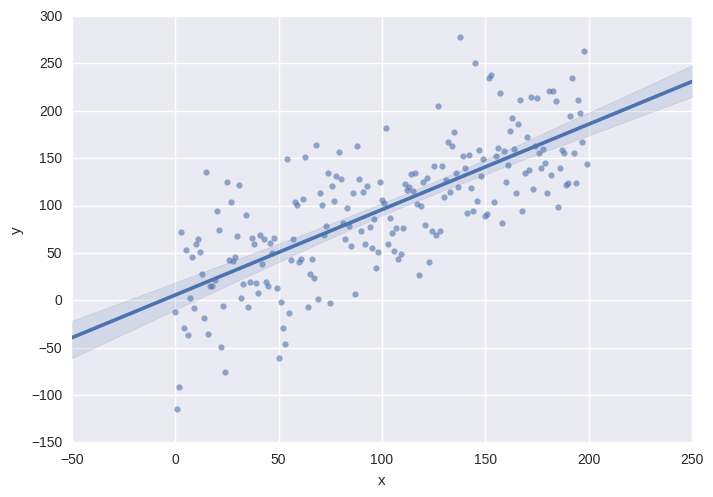

In [44]:
y = map(lambda x: random.normalvariate(x,50), range(200))
dfy = pd.DataFrame({'y':y, 'x':range(200)})
sns.regplot(x='x',y='y',data=dfy, scatter_kws={'alpha':0.6})
sns.plt.show()

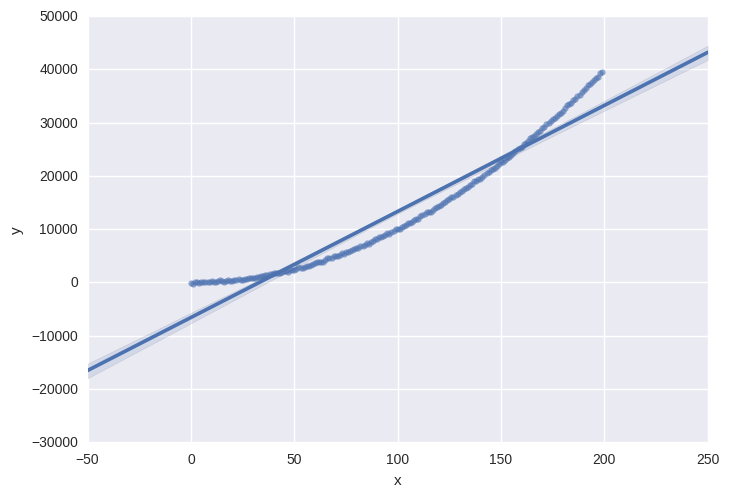

In [45]:
y = map(lambda x: random.normalvariate(x**2,100), range(200))
dfy = pd.DataFrame({'y':y, 'x':range(200)})
sns.regplot(x='x',y='y',data=dfy, scatter_kws={'alpha':0.6})
sns.plt.show()

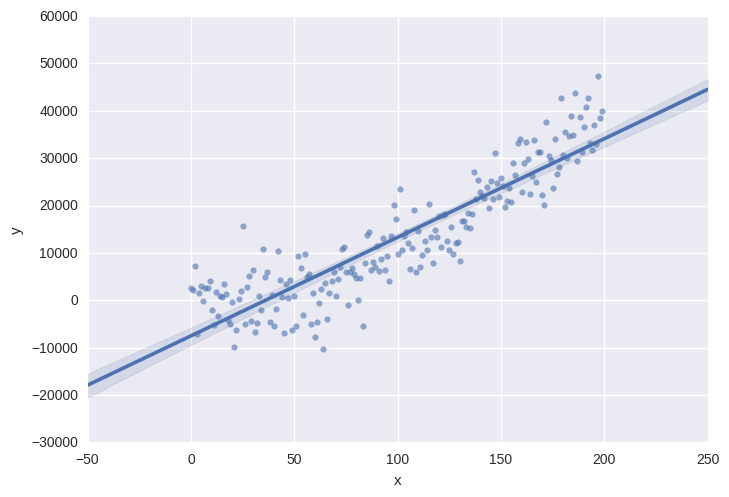

In [46]:
y = map(lambda x: random.normalvariate(x**2,5000), range(200))
dfy = pd.DataFrame({'y':y, 'x':range(200)})
sns.regplot(x='x',y='y',data=dfy, scatter_kws={'alpha':0.6})
sns.plt.show()